In [60]:
import os
import sys
import glob
import csv
import math
from collections import defaultdict
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor


In [2]:
dir_in = 'Results/kmer_stats'
k = 4

In [3]:
filenames = glob.glob(f'{dir_in}/*/*_k{k}_stats.csv')

In [25]:
filenames[0]

'Results/kmer_stats/Methyloligella/Methyloligella_k4_stats.csv'

In [27]:
def get_data_from_csv_files(filename, cols):
    df = pd.read_csv(filename, usecols=cols)
    return df

In [31]:
d1 = get_data_from_csv_files(filenames[0], ['kmer','Observed','Expected'])

In [35]:
d1

,kmer,Observed,Expected
0,AAAA,4957,4609.178530
1,AAAC,4775,4560.900377
2,AAAG,7317,9332.325157
3,AAAT,6246,4792.595937
4,AACA,5554,3664.303196
...,...,...,...
251,TTGT,5163,4617.723241
252,TTTA,2014,1965.636011
253,TTTC,11439,10741.708283
254,TTTG,7301,8435.845758


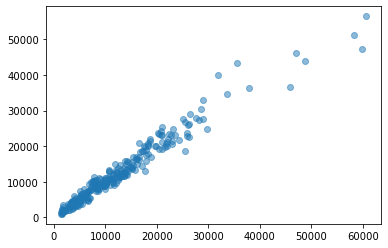

In [44]:
colors = np.random.rand(len(d1.kmer))
plt.scatter(x=d1['Observed'], y=d1['Expected'], alpha=0.5)
plt.show()

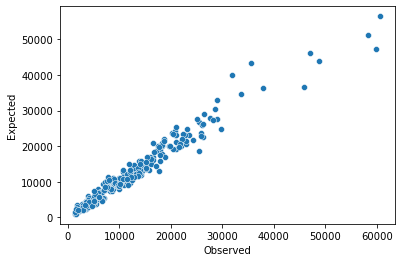

In [48]:
g =sns.scatterplot(x="Observed", y="Expected",
              #hue="Observed",
              data=d1);
# g.set(xscale="log");

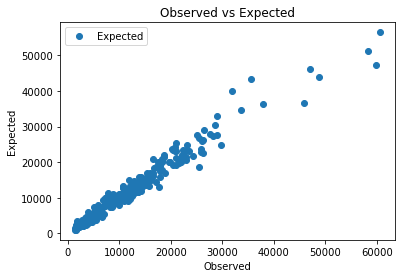

In [52]:
d1.plot(x='Observed', y='Expected', style='o')  
plt.title('Observed vs Expected')  
plt.xlabel('Observed')  
plt.ylabel('Expected')  
plt.show()

<Figure size 1080x720 with 0 Axes>

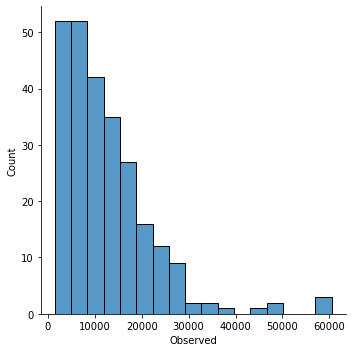

In [55]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(d1['Observed'])

In [56]:
X = d1['Observed'].values.reshape(-1,1)
y = d1['Expected'].values.reshape(-1,1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [59]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[480.79530472]
[[0.97444295]]


In [60]:
y_pred = regressor.predict(X_test)

In [61]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,24858.187637,29480.217389
1,13172.925075,13229.432372
2,12692.172352,13696.190543
3,36606.728805,45086.895618
4,51131.097649,57264.509118
5,3437.420066,4429.238123
6,22815.537057,25569.777845
7,2151.464142,2657.700847
8,5303.779106,7191.783876
9,5146.586625,4702.082148


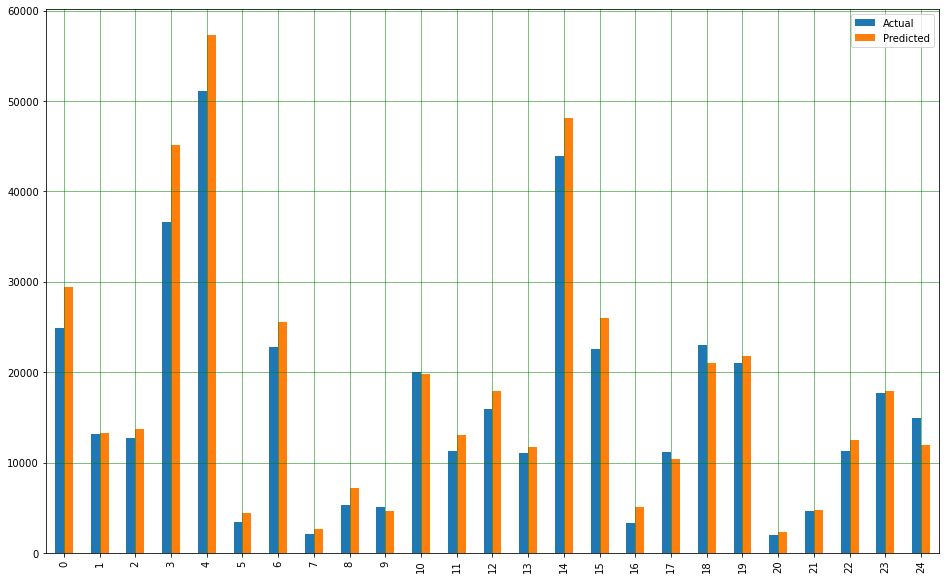

In [62]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

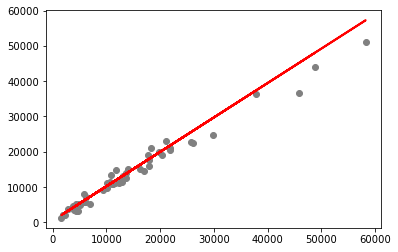

In [63]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1462.4359246770703
Mean Squared Error: 4601716.780150727
Root Mean Squared Error: 2145.1612480535646


In [69]:
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	plt.scatter(X, y)
	# plot the line of best fit
	xaxis = np.arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	plt.plot(xaxis, yaxis, color='r')
	# show the plot
	plt.title(type(model).__name__)
	plt.show()

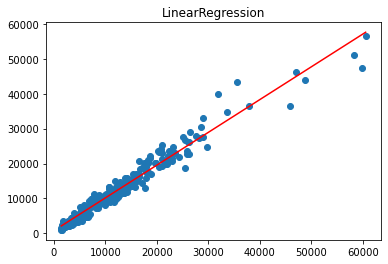

In [70]:
model = LinearRegression()
plot_best_fit(X, y, model)

In [81]:
# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models

In [78]:
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return np.absolute(scores)

In [86]:
# plot the dataset and the model's line of best fit
def plot_best_fit_(X, y, xaxis, model):
	# fit the model on all data
	model.fit(X, y)
	# calculate outputs for grid across the domain
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	# plot the line of best fit
	plt.plot(xaxis, yaxis, label=type(model).__name__)

Mean MAE: 1403.131 (326.421)


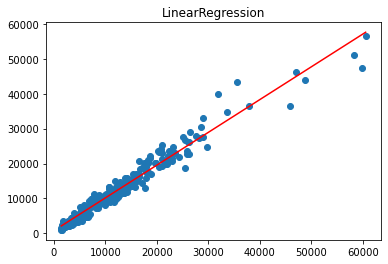

In [87]:
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (np.mean(results), np.std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)

/home/paulosschlogl/anaconda3/envs/Bioinfo/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/paulosschlogl/anaconda3/envs/Bioinfo/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


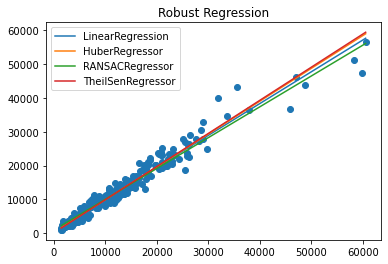

In [88]:
xaxis = np.arange(X.min(), X.max(), 0.01)
for model in get_models():
	# plot the line of best fit
	plot_best_fit_(X, y, xaxis, model)
# plot the dataset
plt.scatter(X, y)
# show the plot
plt.title('Robust Regression')
plt.legend()
plt.show()

In [21]:
# columns kmer,Observed,Expected,Z_score,E_values,P_values,Frequency

def get_kmer_data_from_csv(filename, column_interest, value_type=int):
    kmer_data = defaultdict(value_type)
    with open(filename, 'r') as fh:
        csvreader = csv.reader(fh)
        col_idx = next(csvreader).index(column_interest)
        for row in csvreader:
            kmer, values = row[0], row[col_idx]
            kmer_data[kmer] = value_type(values)
    return kmer_data

In [22]:
sum(get_kmer_data_from_csv(filenames[0], 'Frequency', value_type=float).values())

1.0000000000000002

In [7]:
def get_all_data_from_csvs(filenames, column_interest, value_type=int):
    data_all = defaultdict(dict)
    for filename in filenames:
        name = filename.split('/')[2]
        data_all[name] = get_kmer_data_from_csv(filename, column_interest, value_type=value_type)
    return data_all

In [8]:
data = get_all_data_from_csvs(filenames[0:3], 'Frequency', value_type=float)

In [9]:
data

defaultdict(dict,
            {'Methyloligella': defaultdict(float,
                         {'AAAA': 0.001534299185555488,
                          'AAAC': 0.001477966231798962,
                          'AAAG': 0.0022647704540467023,
                          'AAAT': 0.0019332726877102234,
                          'AACA': 0.0017190836547458501,
                          'AACC': 0.0017797499126374933,
                          'AACG': 0.002540863831798467,
                          'AACT': 0.0010950878592889482,
                          'AAGA': 0.0034465243960379983,
                          'AAGC': 0.005341416389980039,
                          'AAGG': 0.004661087640766611,
                          'AAGT': 0.0011498732044257893,
                          'AATA': 0.0013154673267320603,
                          'AATC': 0.002482983269422256,
                          'AATG': 0.0021121762441457833,
                          'AATT': 0.0015866083569008333,
                          

In [50]:
def make_data_correlation(data_dict, out_file_name=None, method='pearson', as_save=False):
    df = pd.DataFrame(data_dict)
    df_cor = df.corr(method=method)
    if as_save:
        csv_name = out_file_name
        df_cor.to_csv(csv_name)
    return df_cor       

In [51]:
make_data_correlation(data)

,Methyloligella,Xenorhabdus,Undibacterium
Methyloligella,1.000000,-0.107901,0.342798
Xenorhabdus,-0.107901,1.000000,0.624370
Undibacterium,0.342798,0.624370,1.000000


In [54]:
make_data_correlation(data, 'Results/test_cor_file.csv', as_save=True)

,Methyloligella,Xenorhabdus,Undibacterium
Methyloligella,1.000000,-0.107901,0.342798
Xenorhabdus,-0.107901,1.000000,0.624370
Undibacterium,0.342798,0.624370,1.000000


In [3]:
filenames = glob.glob('Results/BasicStats/*/Chromosomes/*_chr_gc.csv')

In [4]:
len(filenames)

1220

In [9]:
def reading_data_from_csv(filenames):
    data = defaultdict(dict)
    for filename in filenames:
        name = filename.split('/')[2]
        with open(filename, 'r') as fh:
            csvreader = csv.reader(fh)
            col_names = next(csvreader)
            for row in csvreader:
                data[name][row[0]] = float(row[1])
    return data

In [11]:
bact_basics = reading_data_from_csv(filenames)

In [19]:
gc_bac = pd.DataFrame(bact_basics).loc['GC']

In [23]:
gc_bac_mean = gc_bac.mean()
gc_bac_sd = gc_bac.std()

In [24]:
gc_bac_mean, gc_bac_sd

(52.61076700003421, 13.037751508204483)

In [28]:
df_bac_gc = pd.DataFrame(gc_bac)

In [29]:
df_bac_gc

,GC
Methyloligella,63.700747
Xenorhabdus,44.774330
Undibacterium,50.998396
Tenuifilum,38.292897
Dyadobacter,51.544994
...,...
Verrucosispora,71.706909
Methylocaldum,58.746958
Sulfurovum,43.871486
Nostoc,41.340697


In [31]:
df_bac_gc['zscr'] = (df_bac_gc['GC'] - gc_bac_mean) / gc_bac_sd

In [33]:
df_bac_gc.sort_values('GC')

,GC,zscr
Candidatus_Nardonella,17.738326,-2.674728
Candidatus_Annandia,17.791997,-2.670612
Candidatus_Carsonella,17.822397,-2.668280
unclassified_Enterobacteriaceae,20.365158,-2.473249
Candidatus_Sulcia,20.946760,-2.428640
...,...,...
Modestobacter,74.131137,1.650620
Cellulosimicrobium,74.144518,1.651646
Cellulomonas,74.345320,1.667048
Kineococcus,74.435031,1.673929


In [50]:
x = df_bac_gc['GC'].sort_values().values

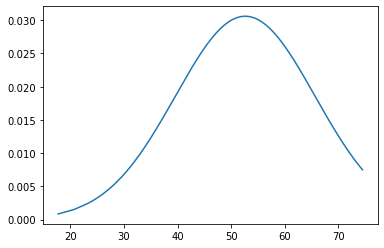

In [51]:
plt.plot(x, stats.norm.pdf(x, gc_bac_mean, gc_bac_sd))
plt.show()

In [54]:
# dict(zip(list('acgt'), [0]*4))

{'a': 0, 'c': 0, 'g': 0, 't': 0}

In [58]:
# def makeCode():
#     nt = 'TCAG'
#     L = list(nt)
#     codons = [n1+n2+n3 for n1 in L for n2 in L for n3 in L]
#     aa = 'FFLLSSSSYY**CC*WLLLLPPPPHHQQRRRR' +\
#          'IIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
#     return dict(zip(codons, list(aa)))

In [72]:
x.max(), x.min(), gc_bac_mean

(74.48797225952148, 17.738325893878937, 52.61076700003421)

In [71]:
df_bac_gc[df_bac_gc['GC'] >= gc_bac_mean]

,GC,zscr
Methyloligella,63.700747,0.850605
Alloactinosynnema,69.590169,1.302326
Parolsenella,65.388799,0.980079
Rhodobacter,69.039142,1.260062
Thermanaerovibrio,58.776885,0.472943
...,...,...
Modestobacter,74.131137,1.650620
Massilia,64.741814,0.930455
Verrucosispora,71.706909,1.464681
Methylocaldum,58.746958,0.470648


In [75]:
gc_df_summ = df_bac_gc.describe()

In [76]:
gc_df_summ

,GC,zscr
count,1220.000000,1.220000e+03
mean,52.610767,-8.226571e-17
std,13.037752,1.000000e+00
min,17.738326,-2.674728e+00
25%,41.283836,-8.687795e-01
50%,53.737092,8.638951e-02
75%,64.127550,8.833412e-01
max,74.487972,1.677989e+00


In [81]:
gc_25 = gc_df_summ.loc['25%', 'GC']
gc_50 = gc_df_summ.loc['50%', 'GC']
gc_75 = gc_df_summ.loc['75%', 'GC']

In [87]:
df_bac_gc[(df_bac_gc['GC'] >= gc_25) & (df_bac_gc['GC'] <= gc_50)]

,GC,zscr
Xenorhabdus,44.774330,-0.601057
Undibacterium,50.998396,-0.123669
Dyadobacter,51.544994,-0.081745
Limnobaculum,46.041551,-0.503861
Caldithrix,45.095822,-0.576399
...,...,...
Melioribacter,41.328117,-0.865383
Heliorestis,43.075183,-0.731383
Candidatus_Nanopelagicus,41.450182,-0.856021
Sulfurovum,43.871486,-0.670306


In [88]:
df_bac_gc[(df_bac_gc['GC'] >= gc_50) & (df_bac_gc['GC'] <= gc_75)]

,GC,zscr
Methyloligella,63.700747,0.850605
Thermanaerovibrio,58.776885,0.472943
Chromohalobacter,63.911855,0.866797
Paenarthrobacter,63.438523,0.830493
Chloroflexus,56.681901,0.312257
...,...,...
Dechloromonas,59.247220,0.509018
Renibacterium,56.271160,0.280753
Nissabacter,60.764831,0.625420
Methylocaldum,58.746958,0.470648


In [93]:
df_bac_gc[(df_bac_gc['GC'] <= gc_25)].max(), df_bac_gc[(df_bac_gc['GC'] <= gc_25)].min()

(GC      41.265944
 zscr    -0.870152
 dtype: float64, GC      17.738326
 zscr    -2.674728
 dtype: float64)